In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib as plt
from umap import UMAP
import matplotlib.pyplot

In [3]:
a = np.load("../Data/AutoEncoded/cup1Enc.npy")

In [4]:
actions = np.load("../Data/Chunkized/cupheadkb.npz", allow_pickle=True)["y"]

In [5]:
actionList = []                     #add all actions to list of actions
for act in actions:
    actionList.append(act)
    

In [7]:
colorMapping = {'loading':'red', 'death':'black','map':'brown','play':'blue','win':'green'} #json for colors
colors = np.array([colorMapping[color] for color in actionList])                            #maps the state of the game to colors
print(colors)

['red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'red'
 'red' 'red' 'red' 'red' 'red' 'red' 'red' 'brown' 'brown' 'brown' 'brown'
 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown'
 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown'
 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown' 'brown'
 'brown' 'brown' 'brown' 'brown' 'brown' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' '

In [68]:
reducer = UMAP()                         #create a new UMAP

In [69]:
dataTrans = reducer.fit_transform(a)     #fit the data points to the UMAP

In [76]:
#create a k means 
kmeans = KMeans(n_clusters=len(colorMapping), random_state=0, n_init="auto").fit(dataTrans)

In [79]:
#get the data for the center of the clusters
centers = kmeans.cluster_centers_

In [80]:
#take x coordinates and y coordinates from k-means center data
centerX = centers[:,0]
centerY = centers[:,1]

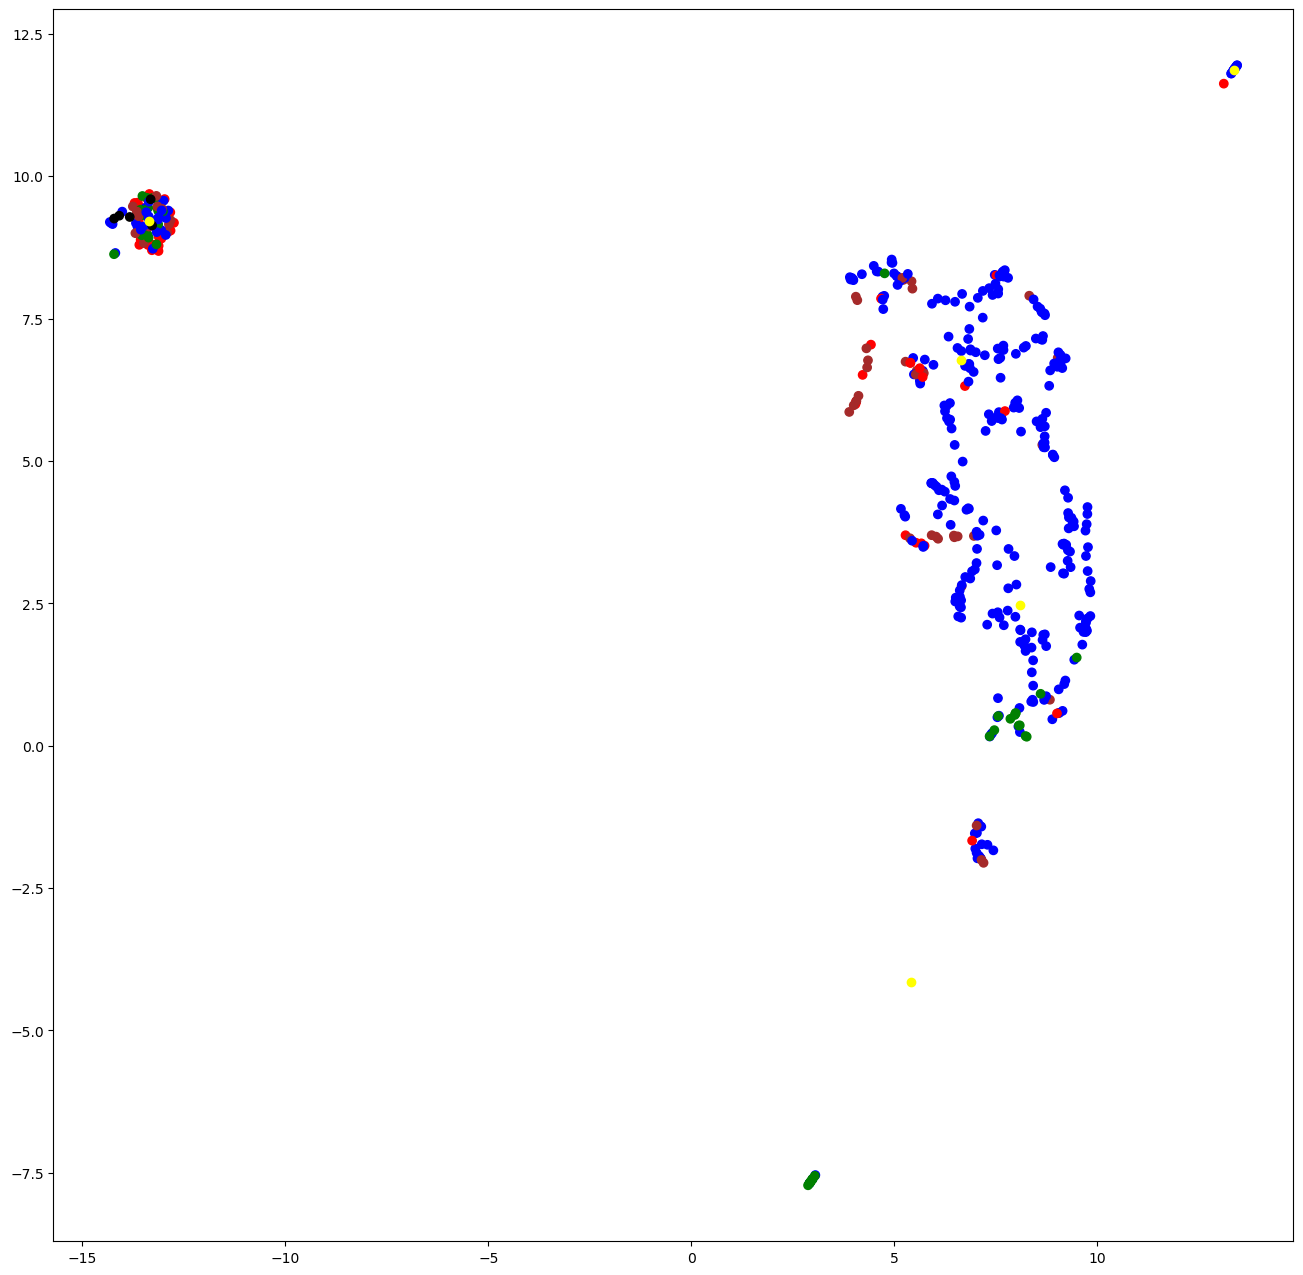

In [82]:
x = dataTrans[:, 0]        #take x coordinates and y coordinates from the gameplay data
y = dataTrans[:,1]
plt.pyplot.figure(figsize=(16,16))  #set the size of figure 
plt.pyplot.scatter(                 #plot the gameplay data
    x,y,c = colors
)
plt.pyplot.scatter(                 #plot the centroids
    centerX, centerY, c = 'yellow'
)